<h1> REGRESSÃO LINEAR SIMPLES </h1>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

<h1> DADOS </h1>

In [65]:
x = [0.5,2.2,2.0]
y = [2.0,2.5,1.4]

<h2> TAXA DE APRENDIZADO (velocidade de descida) </h2>

In [66]:
alpha = 0.01

<h2> VALORES INICIAIS PARA W0 E W1 </h2>

In [67]:
w0 = 0.1
w1 = 0.1

<h2> DEFININDO A HIPÓTESE </h2>

In [68]:
def y_hat(x,w0,w1):
    return w0 + w1*x

<h5> realizando uma predição ainda com custo alto </h5>

In [69]:
y_hat(1.5,w0,w1)

0.25

<h2> FUNCÃO PARA PLOTAR PONTOS E REGRESSÃO </h2>

In [70]:
def plot_line(X, y, w0, w1):
    x_values = [i for i in range(int(min(X))-1, int(max(X))+2)]
    y_values = [y_hat(x,w0,w1) for x in x_values]
    plt.plot(x_values,y_values,'r')
    plt.plot(X,y,'bo')

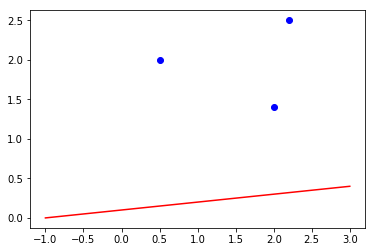

In [71]:
plot_line(x,y,w0,w1)

<h2> FUNÇÃO MSE (Média do erro ao quadrado) </h2>

In [72]:
def MSE(X,y,w0,w1):
    custo = 0
    m = float(len(X))
    for i in range(0, len(X)):
        custo += (y_hat(X[i], w0, w1)-y[i])**2
    
    return custo/m

In [73]:
MSE(x,y,w0,w1)

3.1282999999999994

<h1 forecolor='blue'> ALGORITMO DO GRADIENTE DESCENDENTE</h1>

In [74]:
def gradient_descent_step(w0, w1, X, y, alpha):
    
    erro_w0 = 0
    erro_w1 = 0
    m = float(len(X))
    
    for i in range(0,len(X)):
        erro_w0 += y_hat(X[i], w0, w1) - y[i]
        erro_w1 += (y_hat(X[i], w0, w1) - y[i]) * X[i]
        
    new_w0 = w0 - alpha * (1/m) * erro_w0
    new_w1 = w1 - alpha * (1/m) * erro_w1

    return new_w0, new_w1

In [75]:
w0,w1 = gradient_descent_step(w0,w1,x,y,alpha)

In [76]:
print("w0={}, w1={}".format(w0,w1))

w0=0.11710000000000001, w1=0.12640333333333334


<h3> GRADIENTE DESCENDENTE LOOP </h3>

In [77]:
epoch = 800

In [78]:
def gradient_descent(w0, w1, X, y, alpha, epoch):
    custo = np.zeros(epoch)
    for i in range(epoch):
        w0 , w1 = gradient_descent_step(w0, w1, X, y , alpha)
        custo[i] = MSE(X,y,w0,w1)
        
    return w0, w1, custo
    

In [79]:
w0,w1,custo = gradient_descent(w0,w1,x,y,alpha,epoch)

In [80]:
custo

array([2.75481098, 2.58898416, 2.43569679, 2.29399451, 2.16299563,
       2.04188557, 1.92991176, 1.82637893, 1.73064474, 1.64211573,
       1.56024364, 1.48452194, 1.41448265, 1.34969343, 1.28975485,
       1.23429788, 1.18298158, 1.13549098, 1.09153508, 1.05084502,
       1.01317242, 0.9782878 , 0.94597917, 0.91605065, 0.88832129,
       0.8626239 , 0.83880403, 0.81671898, 0.79623691, 0.77723603,
       0.75960381, 0.74323628, 0.7280374 , 0.71391842, 0.70079738,
       0.68859852, 0.67725187, 0.66669278, 0.65686152, 0.6477029 ,
       0.63916595, 0.63120356, 0.62377221, 0.61683171, 0.6103449 ,
       0.60427747, 0.59859771, 0.59327633, 0.58828627, 0.58360252,
       0.57920198, 0.57506331, 0.57116679, 0.5674942 , 0.56402872,
       0.56075478, 0.55765802, 0.55472517, 0.55194396, 0.54930306,
       0.54679199, 0.5444011 , 0.54212143, 0.53994473, 0.53786337,
       0.53587031, 0.53395902, 0.53212349, 0.53035816, 0.52865789,
       0.52701793, 0.5254339 , 0.52390175, 0.52241772, 0.52097

<h3> PLOTANDO O CUSTO </h3>

Text(0.5,1,'MSE vs. Epoch')

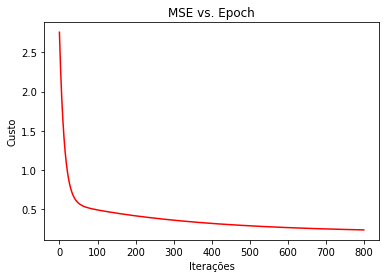

In [81]:
fig, ax= plt.subplots()
ax.plot(np.arange(epoch),custo,'r')
ax.set_xlabel('Iterações')
ax.set_ylabel('Custo')
ax.set_title('MSE vs. Epoch')

<h3> PLOTANDO A HIPÓTESE OTIMIZADA </h3>

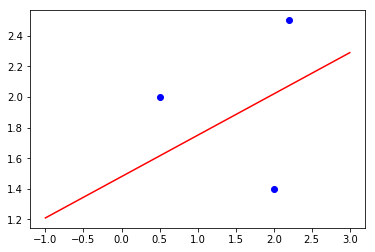

In [82]:
plot_line(x,y,w0,w1)

In [83]:
y_hat(1.5,w0,w1)

1.8841287670370264

In [84]:
print("w0={},w1={}".format(w0,w1))

w0=1.4797891950670756,w1=0.2695597146466338
